In [7]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

## Data Loading

In [8]:
df = pd.read_csv("dataset/fraudTrain.csv", encoding='latin-1')

In [9]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Data Pre-Processing

In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# check for duplicated records
df.duplicated().sum()

np.int64(0)

In [9]:
# Drop irrelevent col 
df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'first', 'last', 'unix_time', 'trans_num', 'street', 'city'], inplace=True)

In [10]:
df.shape

(1296675, 15)

In [11]:
# convert to correct datetime type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [12]:
# Extract date and time components from the transaction timestamp
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute

# Remove the original timestamp column 
df.drop(columns=['trans_date_trans_time'], inplace=True)

In [13]:
# Extract age of person
df['dob'] = pd.to_datetime(df['dob'])
df['year_dob'] = df['dob'].dt.year
df['age'] = df['year'] - df['year_dob']

In [14]:
df['is_fraud'].unique()

array([0, 1])

In [15]:
# Outliers treatment

# Creating fraudulent dataframe
data_fraud = df[df['is_fraud'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['is_fraud'] == 0]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\AppData\Local\Temp\ipykernel_4140\866954341.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['day'],label='fraudulent',hist=False)
C:\Users\Hp\AppData\Local\Temp\ipykernel_4140\866954341.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dat

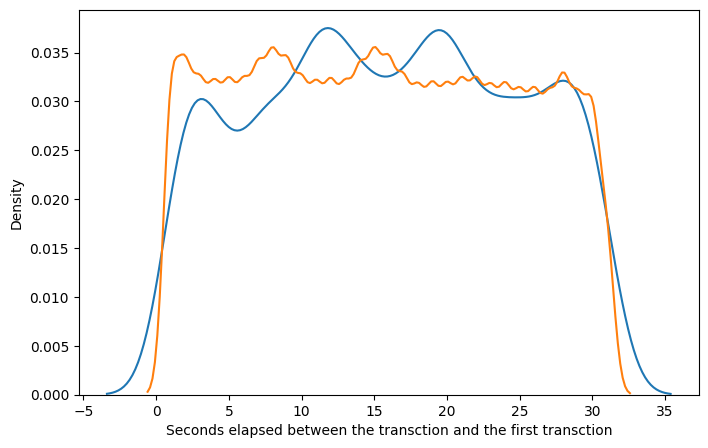

In [17]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['day'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['day'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

### Exploratory Data Analysis

In [18]:
df.describe()

,amt,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,day,month,year,hour,minute,year_dob,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,3.853734e+01,-9.022646e+01,5.788652e-03,1.558798e+01,6.142150e+00,2.019287e+03,1.280486e+01,2.949529e+01,1.973257e+03,4.602930e+01
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,1.924000e+03,1.400000e+01
25%,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,3.473357e+01,-9.689728e+01,0.000000e+00,8.000000e+00,3.000000e+00,2.019000e+03,7.000000e+00,1.400000e+01,1.962000e+03,3.300000e+01
50%,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,3.936568e+01,-8.743839e+01,0.000000e+00,1.500000e+01,6.000000e+00,2.019000e+03,1.400000e+01,3.000000e+01,1.975000e+03,4.400000e+01
75%,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,4.195716e+01,-8.023680e+01,0.000000e+00,2.300000e+01,9.000000e+00,2.020000e+03,1.900000e+01,4.400000e+01,1.987000e+03,5.700000e+01
max,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,6.751027e+01,-6.695090e+01,1.000000e+00,3.100000e+01,1.200000e+01,2.020000e+03,2.300000e+01,5.900000e+01,2.005000e+03,9.600000e+01
std,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,5.109788e+00,1.377109e+01,7.586269e-02,8.829121e+00,3.417703e+00,4.522452e-01,6.817824e+00,1.732018e+01,1.737848e+01,1.738237e+01


In [19]:
# Filter for non-numeric columns

df.describe(include='object')

,merchant,category,gender,state,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,51,494
top,fraud_Kilback LLC,gas_transport,F,TX,Film/video editor
freq,4403,131659,709863,94876,9779


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Fraud Rate by Category (%):
category
shopping_net      1.76
misc_net          1.45
grocery_pos       1.41
shopping_pos      0.72
gas_transport     0.47
misc_pos          0.31
grocery_net       0.29
travel            0.29
entertainment     0.25
personal_care     0.24
kids_pets         0.21
food_dining       0.17
home              0.16
health_fitness    0.15
Name: is_fraud, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_4140\2066941652.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_fraud.index, y=category_fraud.values, palette="viridis")


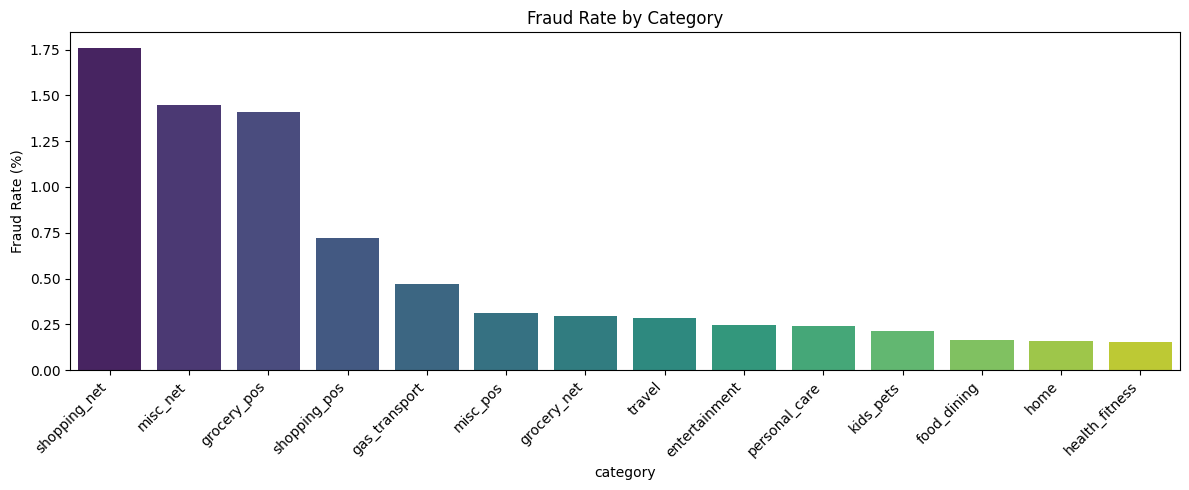

In [21]:
# Fraud Rate by Category

category_fraud = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False) * 100
print("Fraud Rate by Category (%):")
print(category_fraud.round(2))  # Print with 2 decimal places

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=category_fraud.index, y=category_fraud.values, palette="viridis")

plt.title('Fraud Rate by Category')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Fraud Rate by Gender (%):
gender
M    0.64
F    0.53
Name: is_fraud, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_4140\3403912112.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette="magma")


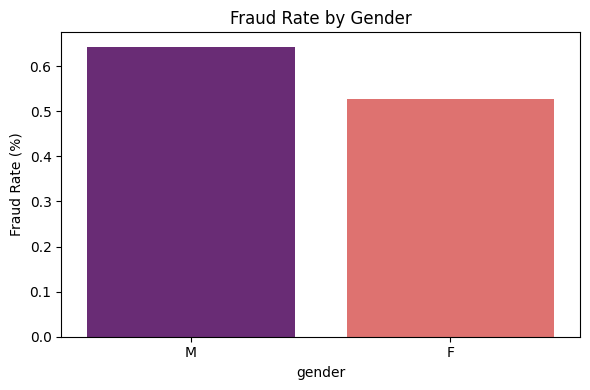

In [22]:
# Fraud Rate by Gender

gender_fraud = df.groupby('gender')['is_fraud'].mean().sort_values(ascending=False) * 100
print("\nFraud Rate by Gender (%):")
print(gender_fraud.round(2))

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_fraud.index, y=gender_fraud.values, palette="magma")

plt.title('Fraud Rate by Gender')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()


Fraud Rate by State (%):
state
DE    100.00
RI      2.73
AK      1.70
NV      0.84
CO      0.81
OR      0.80
TN      0.80
NE      0.74
ME      0.72
NH      0.71
OH      0.69
KS      0.68
VA      0.68
NY      0.66
SC      0.66
FL      0.66
MN      0.65
VT      0.61
SD      0.60
MD      0.60
DC      0.58
CA      0.58
PA      0.57
IL      0.57
UT      0.57
WY      0.57
WV      0.57
GA      0.56
MA      0.56
WI      0.56
KY      0.54
MS      0.54
OK      0.54
IA      0.53
AL      0.52
AR      0.52
MI      0.52
IN      0.51
WA      0.51
TX      0.50
NM      0.50
MO      0.50
NC      0.49
NJ      0.48
LA      0.43
ND      0.39
AZ      0.34
HI      0.27
MT      0.27
CT      0.21
ID      0.20
Name: is_fraud, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_4140\4163580537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_fraud.index, y=state_fraud.values, palette="coolwarm")


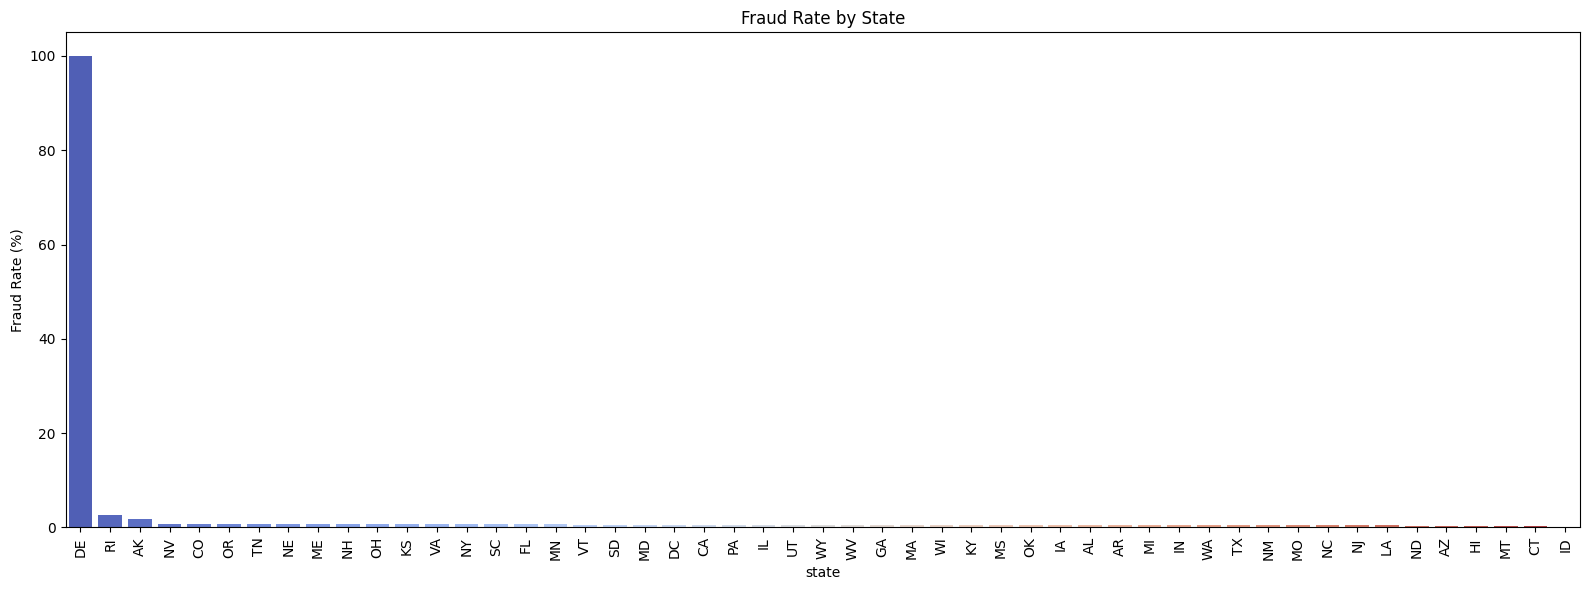

In [23]:
# Fraud Rate by State

state_fraud = df.groupby('state')['is_fraud'].mean().sort_values(ascending=False) * 100
print("\nFraud Rate by State (%):")
print(state_fraud.round(2))

plt.figure(figsize=(16, 6))
sns.barplot(x=state_fraud.index, y=state_fraud.values, palette="coolwarm")

plt.title('Fraud Rate by State')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
# Fraud Rate by Time

def fraud_rate_by_time(feature):
    """
    Calculates fraud rate percentage grouped by a given time-based feature.
    """
    # Group by feature and is_fraud label
    temp = df.groupby([feature, 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)

    # Rename columns for clarity
    temp.columns = ['non_fraud', 'fraud']

    # Calculate total and fraud rate
    temp['total_txn'] = temp['non_fraud'] + temp['fraud']
    temp['fraud_rate_%'] = (temp['fraud'] / temp['total_txn']) * 100

    return temp.sort_index().round(2)  # Sort by feature and round for clean output


In [25]:
fraud_by_year = fraud_rate_by_time('year')
fraud_by_month = fraud_rate_by_time('month')
fraud_by_day = fraud_rate_by_time('day')
fraud_by_hour = fraud_rate_by_time('hour')
fraud_by_minute = fraud_rate_by_time('minute')

# Print results
print("📆 Fraud Rate by Year:\n", fraud_by_year)
print("\n📅 Fraud Rate by Month:\n", fraud_by_month)
print("\n📅 Fraud Rate by Day:\n", fraud_by_day)
print("\n⏰ Fraud Rate by Hour:\n", fraud_by_hour)
print("\n⏱️ Fraud Rate by Minute:\n", fraud_by_minute)

📆 Fraud Rate by Year:
       non_fraud  fraud  total_txn  fraud_rate_%
year                                           
2019     919630   5220     924850          0.56
2020     369539   2286     371825          0.61

📅 Fraud Rate by Month:
        non_fraud  fraud  total_txn  fraud_rate_%
month                                           
1         103878    849     104727          0.81
2          96804    853      97657          0.87
3         142851    938     143789          0.65
4         134292    678     134970          0.50
5         145940    935     146875          0.64
6         143123    688     143811          0.48
7          86265    331      86596          0.38
8          86977    382      87359          0.44
9          70234    418      70652          0.59
10         68304    454      68758          0.66
11         70033    388      70421          0.55
12        140468    592     141060          0.42

📅 Fraud Rate by Day:
      non_fraud  fraud  total_txn  fraud_rate_%
day 

C:\Users\Hp\AppData\Local\Temp\ipykernel_4140\1029317691.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['is_fraud']


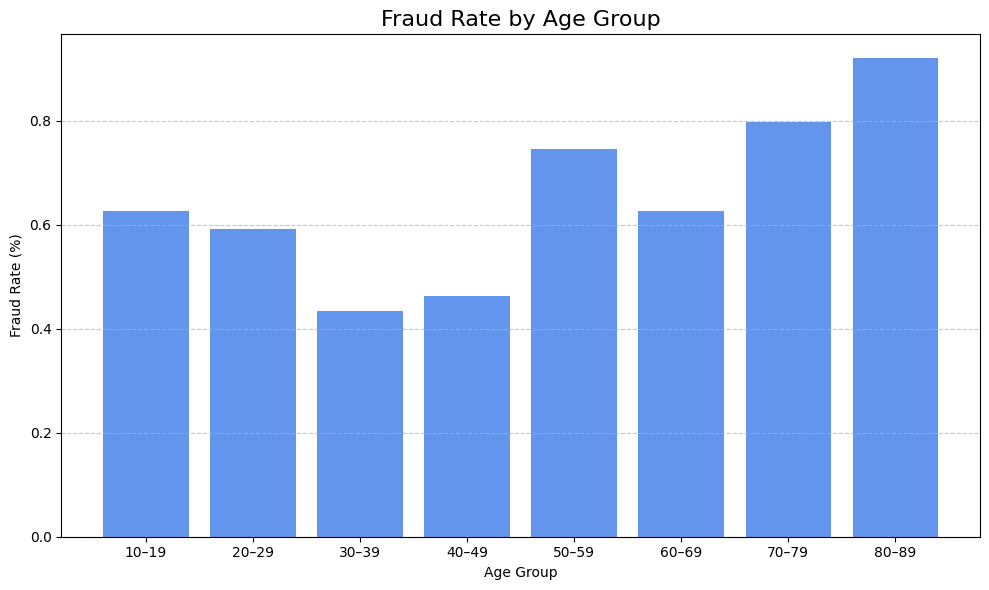

Fraud Rate by Age Group (%):
  age_group  fraud_rate_%
0     10–19          0.63
1     20–29          0.59
2     30–39          0.43
3     40–49          0.46
4     50–59          0.74
5     60–69          0.63
6     70–79          0.80
7     80–89          0.92


In [26]:
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['10–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89']

# 2. Categorize users into age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# 3. Compute fraud rate (%) for each age group
age_fraud_stats = (
    df.groupby('age_group')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate_%')
)

# 4. Plot bar chart of fraud rate by age group
plt.figure(figsize=(10, 6))
plt.bar(age_fraud_stats['age_group'], age_fraud_stats['fraud_rate_%'], color='cornflowerblue')

plt.title('Fraud Rate by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. (Optional) Print numeric values
print("Fraud Rate by Age Group (%):")
print(age_fraud_stats.round(2))

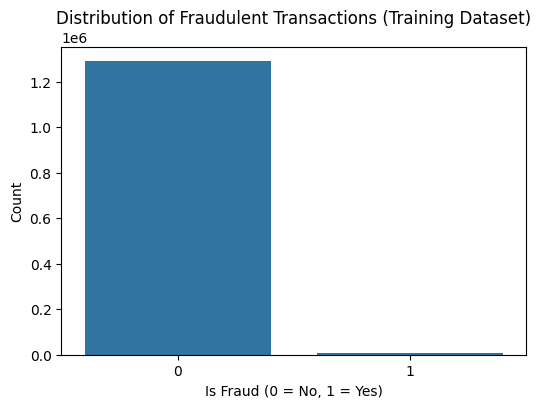

In [27]:
# Distribution of the target variable ('is_fraud') in the training dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent Transactions (Training Dataset)')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [38]:
categorical_cols

['merchant', 'category', 'gender', 'state', 'job']

In [ ]:
# Select categorical and numerical columns for the heatmap
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()   # Example categorical columns, replace with your actual columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist() # Example numerical columns, replace with your actual columns

# Convert categorical columns to numerical using label encoding (you can use other methods if needed)
from sklearn.preprocessing import LabelEncoder
import pickle

df_encoded = df.copy()  # Create a copy to avoid modifying the original DataFrame
label_encoders = {}  # Dictionary to store the fitted label encoders

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  


with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

Text(0.5, 1.0, 'Correlation Heatmap (Categorical vs. Numerical)')

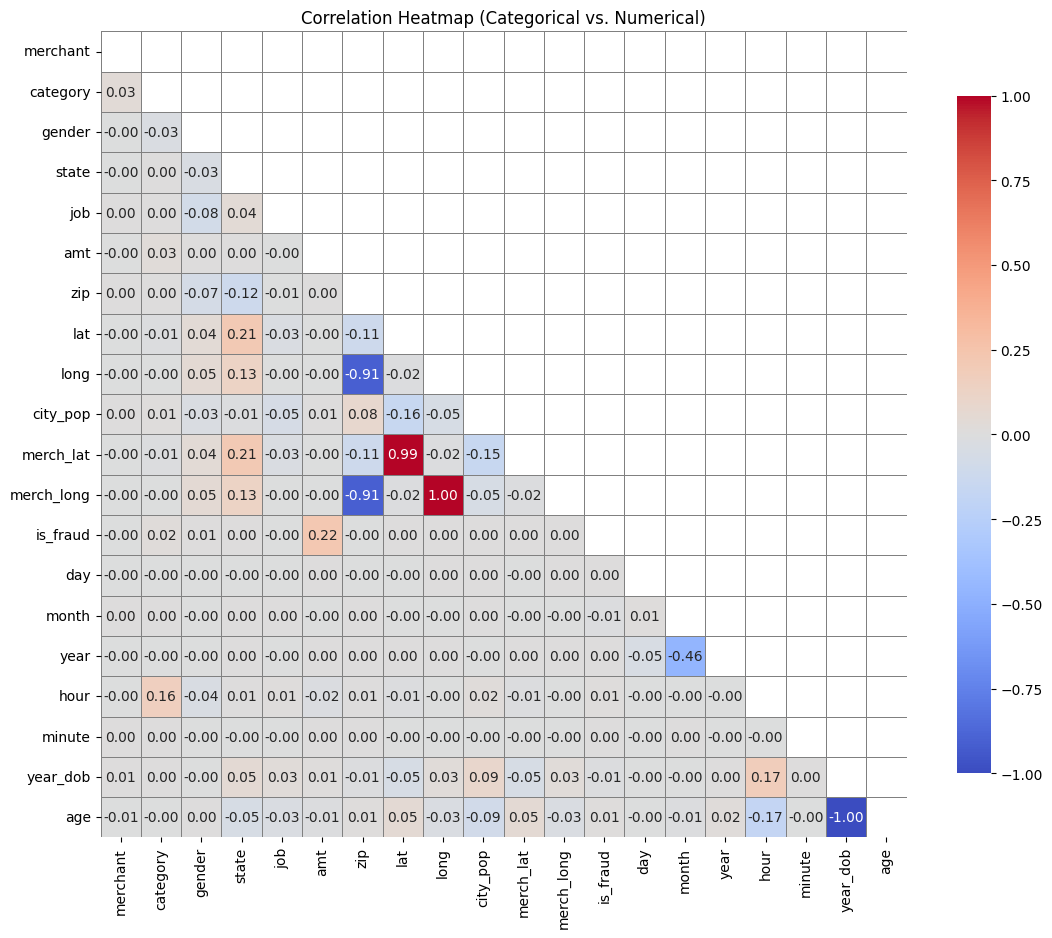

In [ ]:
# Corelation Heatmap



# Select the encoded categorical columns and the numerical columns for correlation
df_heatmap = df_encoded[categorical_cols + numerical_cols]


# Compute the correlation matrix
correlation_matrix = df_heatmap.corr()

# Mask the upper triangle of the matrix to avoid duplication in visualization
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(13, 11))

# Create the heatmap with the mask and a color palette
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            mask=mask,  # Apply the mask to hide the upper triangle
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=.5,  # Add lines between cells
            linecolor='gray',  # Color of the lines
            vmin=-1, vmax=1)  # Set limits for color scale

# Set title
plt.title("Correlation Heatmap (Categorical vs. Numerical)")

In [35]:
df_encoded.head(1).to_dict(orient="records")

[{'merchant': 514,
  'category': 8,
  'amt': 4.97,
  'gender': 0,
  'state': 27,
  'zip': 28654,
  'lat': 36.0788,
  'long': -81.1781,
  'city_pop': 3495,
  'job': 370,
  'dob': Timestamp('1988-03-09 00:00:00'),
  'merch_lat': 36.011293,
  'merch_long': -82.048315,
  'is_fraud': 0,
  'day': 1,
  'month': 1,
  'year': 2019,
  'hour': 0,
  'minute': 0,
  'year_dob': 1988,
  'age': 31,
  'age_group': '30–39'}]

### Machine Learning Modeling

In [30]:
# Define features (X) and target (y) for the training dataset
X = df_encoded.drop(columns=[
    'is_fraud', 
    'dob',
    'age_group',             
    'year_dob'                 
])
y = df_encoded['is_fraud']

In [37]:
df.head(1)

,merchant,category,amt,gender,state,zip,lat,long,city_pop,job,...,merch_long,is_fraud,day,month,year,hour,minute,year_dob,age,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",...,-82.048315,0,1,1,2019,0,0,1988,31,30–39


In [31]:
X.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'merch_lat', 'merch_long', 'day', 'month', 'year',
       'hour', 'minute', 'age'],
      dtype='object')

NameError: name 'df' is not defined

In [36]:
X.head(1).to_dict(orient="records")

[{'merchant': 514,
  'category': 8,
  'amt': 4.97,
  'gender': 0,
  'state': 27,
  'zip': 28654,
  'lat': 36.0788,
  'long': -81.1781,
  'city_pop': 3495,
  'job': 370,
  'merch_lat': 36.011293,
  'merch_long': -82.048315,
  'day': 1,
  'month': 1,
  'year': 2019,
  'hour': 0,
  'minute': 0,
  'age': 31}]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Supervised Learning Approaches

#### 1. Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f" Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

 Decision Tree Accuracy: 99.76%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.78      0.82      0.80      2252

    accuracy                           1.00    389003
   macro avg       0.89      0.91      0.90    389003
weighted avg       1.00      1.00      1.00    389003



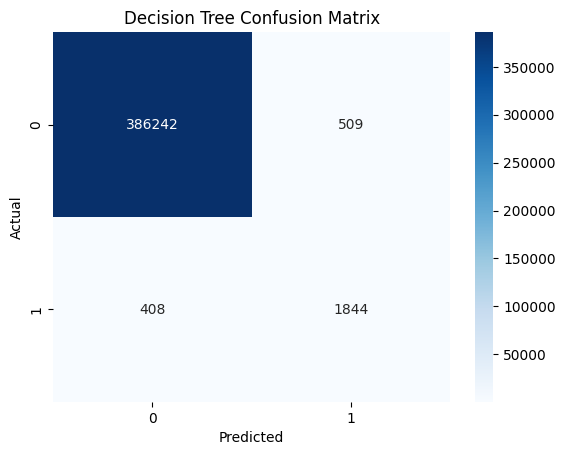

In [39]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [41]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f" Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

 Random Forest Accuracy: 99.84%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.98      0.73      0.84      2252

    accuracy                           1.00    389003
   macro avg       0.99      0.87      0.92    389003
weighted avg       1.00      1.00      1.00    389003



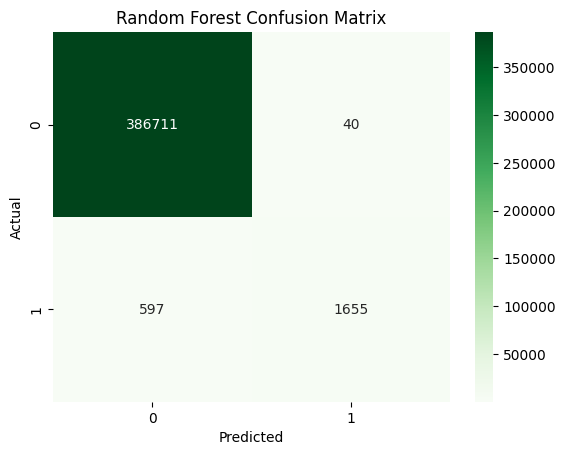

In [42]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 3. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print(f" Logistic Regression Accuracy: {accuracy_log * 100:.2f}%")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


 Logistic Regression Accuracy: 95.16%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    386751
           1       0.09      0.77      0.16      2252

    accuracy                           0.95    389003
   macro avg       0.54      0.86      0.57    389003
weighted avg       0.99      0.95      0.97    389003



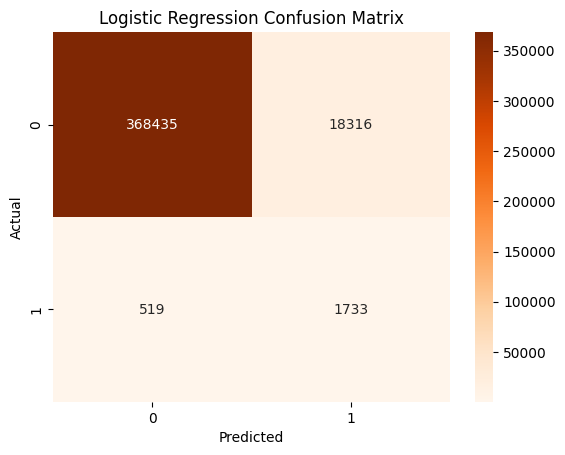

In [44]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 4. Neural Network (MLP Classifier)

In [45]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f" Neural Network (MLP Classifier) Accuracy: {accuracy_log * 100:.2f}%")

print("📌 Neural Network (MLP) Classification Report:")
print(classification_report(y_test, y_pred_nn))

 Neural Network (MLP Classifier) Accuracy: 95.16%
📌 Neural Network (MLP) Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


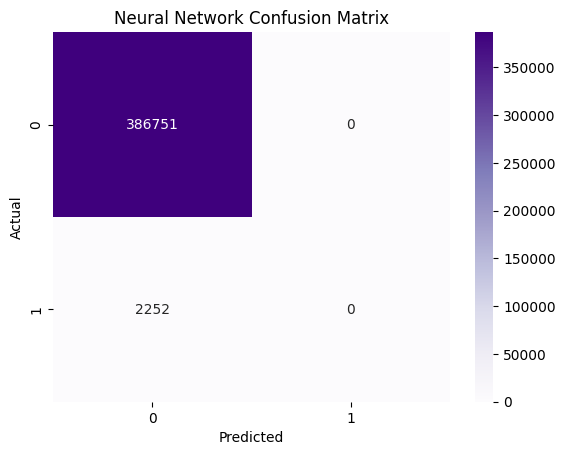

In [46]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Comparing Supervised Models

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store results in a list of dictionaries
model_scores = []

# Decision Tree
model_scores.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt)
})

# Random Forest
model_scores.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf)
})

# Logistic Regression
model_scores.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_log),
    'Precision': precision_score(y_test, y_pred_log),
    'Recall': recall_score(y_test, y_pred_log),
    'F1-Score': f1_score(y_test, y_pred_log)
})

# Neural Network
model_scores.append({
    'Model': 'Neural Network',
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn),
    'F1-Score': f1_score(y_test, y_pred_nn)
})


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
results_df = pd.DataFrame(model_scores)
results_df.set_index('Model', inplace=True)
print(" Model Comparison:")
print(results_df.round(3))

 Model Comparison:
                     Accuracy  Precision  Recall  F1-Score
Model                                                     
Decision Tree           0.998      0.784   0.819     0.801
Random Forest           0.998      0.976   0.735     0.839
Logistic Regression     0.952      0.086   0.770     0.155
Neural Network          0.994      0.000   0.000     0.000


/tmp/ipykernel_36/1689367659.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


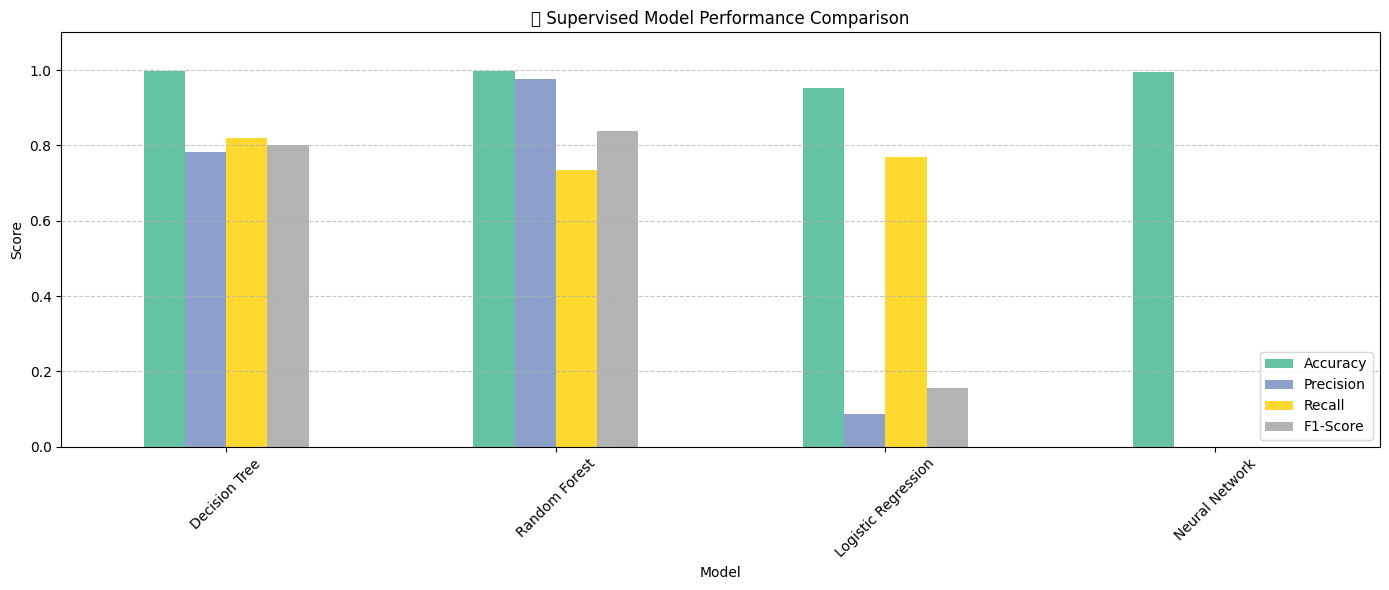

In [49]:
results_df.plot(kind='bar', figsize=(14, 6), colormap='Set2')
plt.title("📊 Supervised Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [55]:
# A clean ROC curve showing how each model handles the fraud classification problem, regardless of class imbalance.



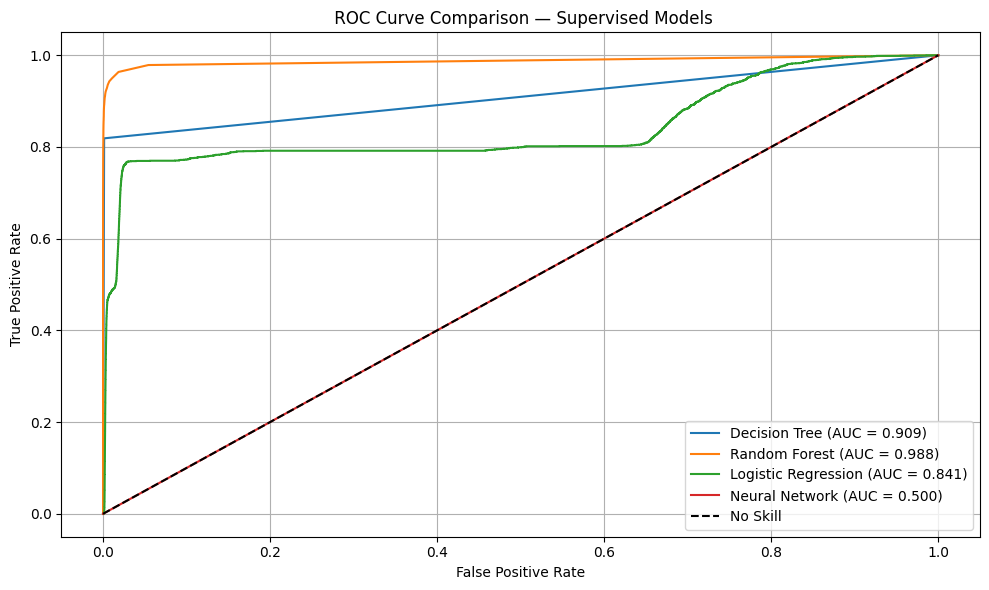

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (not hard predictions)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_log = log_model.predict_proba(X_test)[:, 1]
y_proba_nn = nn_model.predict_proba(X_test)[:, 1]  # if you used MLPClassifier

# Compute FPR, TPR for each
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)

# Compute AUC scores
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_log = auc(fpr_log, tpr_log)
auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.3f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve Comparison — Supervised Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Unsupervised Learning 

In [57]:
X.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'merch_lat', 'merch_long', 'day', 'month', 'year',
       'hour', 'minute', 'age'],
      dtype='object')

In [58]:
X_unsup = X        
y_unsup = y

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_unsup, y_unsup, test_size=0.3, stratify=y, random_state=42)

#### 1. K-Means Clustering

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Fit on training data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

kmeans_preds_test = kmeans.predict(X_test)

# Align cluster labels with actual fraud labels using majority vote per cluster
cluster_map = pd.DataFrame({'cluster': kmeans_preds_test, 'actual': y_test})

# Determine which cluster is fraud (label 1)
fraud_cluster = cluster_map.groupby('cluster')['actual'].mean().idxmax()

# Assign label 1 to the fraud-like cluster
mapped_kmeans = np.where(kmeans_preds_test == fraud_cluster, 1, 0)

print(f"Accuracy: {accuracy_score(y_test, mapped_kmeans) * 100:.2f}%")

# Print results
print("K-Means Classification:")
print(classification_report(y_test, mapped_kmeans))

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 4.87%
K-Means Classification:
              precision    recall  f1-score   support

           0       0.99      0.04      0.08    386751
           1       0.01      0.96      0.01      2252

    accuracy                           0.05    389003
   macro avg       0.50      0.50      0.05    389003
weighted avg       0.99      0.05      0.08    389003



##### K-Means clustering does not perform well for fraud detection due to the fact that it clusters based on feature similarity, not fraud labels.

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

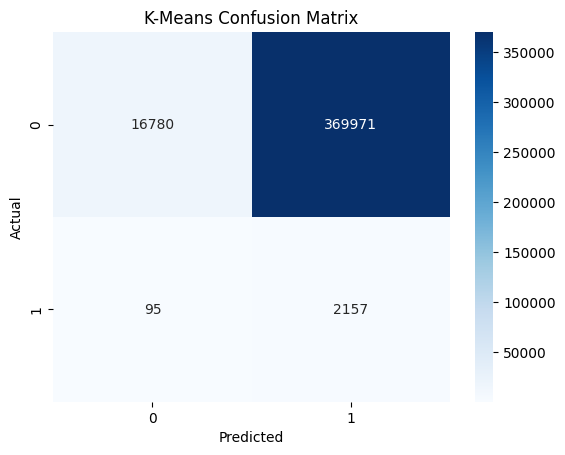

In [62]:
plot_conf_matrix(y_test, mapped_kmeans, "K-Means Confusion Matrix")

#### 2. Isolation Forest

In [63]:
from sklearn.ensemble import IsolationForest

# Train the model
iso = IsolationForest(contamination=0.005, random_state=42)
iso.fit(X_train)

# Predict on test data
iso_preds_test = iso.predict(X_test)

# Map -1 (anomaly) → 1 (fraud), 1 → 0 (not fraud)
mapped_iso = np.where(iso_preds_test == -1, 1, 0)

# Evaluate
print(" Isolation Forest on Test Data:")
print(classification_report(y_test, mapped_iso))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 Isolation Forest on Test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    386751
           1       0.04      0.03      0.04      2252

    accuracy                           0.99    389003
   macro avg       0.52      0.51      0.52    389003
weighted avg       0.99      0.99      0.99    389003



In [64]:
print(f"Accuracy: {accuracy_score(y_test, mapped_iso) * 100:.2f}%")

Accuracy: 98.95%


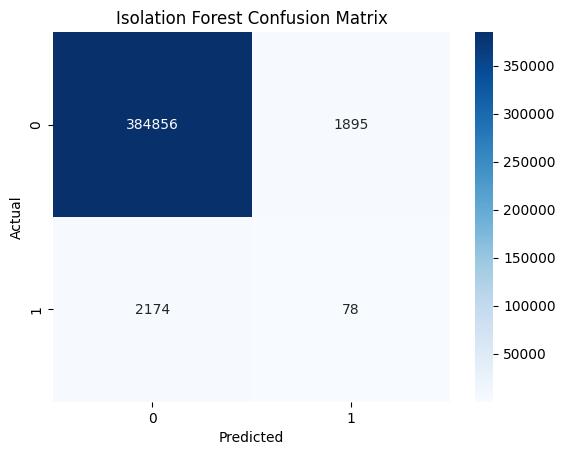

In [65]:
plot_conf_matrix(y_test, mapped_iso, "Isolation Forest Confusion Matrix")

#### 3. Autoencoder

In [66]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

input_dim = X_train.shape[1]

# Build autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation="relu", activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoded = Dense(16, activation="relu")(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train only on normal transactions
X_train_ae = X_train[y_train == 0]
autoencoder.fit(X_train_ae, X_train_ae,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_split=0.1,
                verbose=1)

# Predict on test set
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Set threshold based on training reconstruction error
X_train_pred = autoencoder.predict(X_train)
train_error = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
threshold = np.percentile(train_error, 95)

# Label test predictions
ae_preds = (reconstruction_error > threshold).astype(int)

# Evaluate
print("Autoencoder on Test Data:")
print(classification_report(y_test, ae_preds))
print(f"Accuracy: {accuracy_score(y_test, ae_preds) * 100:.2f}%")

2025-07-30 16:44:38.167611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753893878.367719      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753893878.427486      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-30 16:44:52.164256: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 348545824.0000 - val_loss: 26414.5332
Epoch 2/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 58781.0039 - val_loss: 10707.8535
Epoch 3/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 99212.7812 - val_loss: 90172.8672
Epoch 4/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 63988.1602 - val_loss: 742051.8750
Epoch 5/5
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 76665.9688 - val_loss: 16943.3555
12157/12157 ━━━━━━━━━━━━━━━━━━━━ 11s 907us/step
28365/28365 ━━━━━━━━━━━━━━━━━━━━ 26s 912us/step
Autoencoder on Test Data:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    386751
           1       0.01      0.09      0.02      2252

    accuracy                           0.95    389003
   macro avg       0.50      0.52      0.49    389003
weighted avg       0.99      0.95      0.97    389003

Accuracy: 94.53%


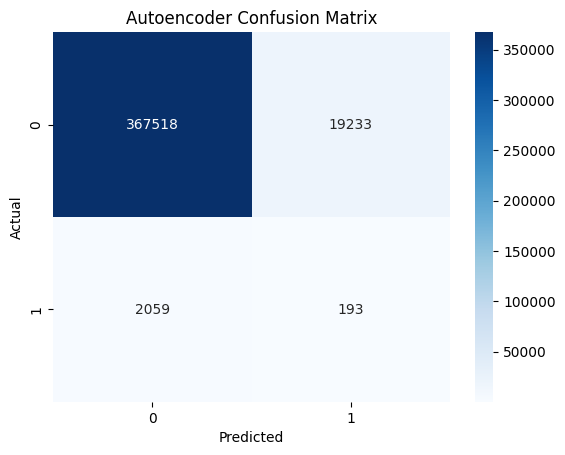

In [67]:
plot_conf_matrix(y_test, ae_preds, "Autoencoder Confusion Matrix")

In [10]:
!streamlit run fraud-detection.py

^C
